<a href="https://colab.research.google.com/github/vanderbilt-data-science/lo-achievement/blob/main/instructor_vector_store_creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Shared Vector Store (for Instructors)

This notebook is for instructors to create a *vector store* which contains all of the information necessary for students to generate their own self-study materials using large language models. It is expected that instructors who will use this notebook know how to run and interact with a Jupyter Notebook, specifically on Google Colab.

:::{.callout-info}
On Colab, there may be a pop-up saying 'Warning: This notebook was not authored by Google'. In that case, click 'Run anyways'. If you started this notebook from the Vanderbilt Data Science github, then you can trust the code in this notebook.
:::

## Setting Up API Access
Much of the following code rely on certain *APIs* (application programming interfaces) which have limited access. You will need to get an *API key* for each of those services which will be inserted into the code to let the service know you are an authorized user.

#### OpenAI

First, you will need an **OpenAI API key**. To do this:
1. Visit [platform.openai.com/account/api-keys](https://platform.openai.com/account/api-keys) and sign up for an account.
2. Click 'Create a secret API key', and give it any name you want.
3. Copy the newly created key, either by right-clicking and pressing 'Copy' or using the keyboard shortcut -- Ctrl+C on Windows, Cmd+C on a Mac.

Run the following code cell. You'll see a blank text box pop up -- paste your API key there (using the shortcut Ctrl+V on Windows, or Cmd+V if you are using a Mac) and press Enter.

In [ ]:
OPENAI_API_KEY = getpass("OpenAI API key: ")

#### DeepLake

Next, you will need to input a **DeepLake API key**, found in the DeepLake dashboard at [app.activeloop.ai](https://app.activeloop.ai).

1. Click the link above and create an account.
2. After making an account, you will be prompted to set a username. Once you have set your username, copy it, run the code below, paste the username into the text box, and press Enter. (This username will be shared with students.)

In [ ]:
DEEPLAKE_USERNAME = input("DeepLake username: ")

3. You should then be on the DeepLake dashboard. At the top, click 'Create API token'. You should see an empty table with the columns 'Name', 'Expiration date', and 'Token'.
4. Click the 'Create API token' button 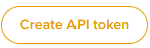 at the right of the page, choose a name for the token, then click 'Create API token'. (You do not need to change the expiration date.)
5. Afterwards, you should see the table look something like this:

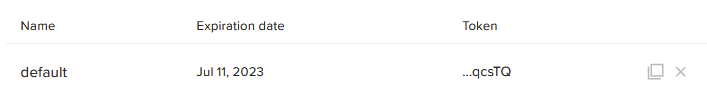

6. Click the two overlaid squares 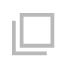 to copy the API key; then run the code below and paste it into the input text box and press Enter.

In [ ]:
os.environ['ACTIVELOOP_TOKEN'] = getpass("DeepLake API key: ")

Finally, pick a name for your dataset. It doesn't matter what this is, but keep in mind that it will be shared with the students.

In [ ]:
dataset_name = input("Enter a name for your dataset: ")

## Processing The Document(s)

In this part, you will upload the documents you want the students / model to reference; the embeddings will be created from those documents.

**Note: The embeddings of all the documents you share will be publicly available. Do not use this for any documents you want to keep private.**

First, upload your documents to Google Colab. To do this:
1. Click on the 'file' icon 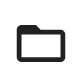 at the bottom of the sidebar to the left of these instructions.
2. Click on the 'upload file' icon 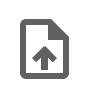 on the left of the Files toolbar.
3. Select all of the files you want to upload, then click 'Open'.
4. A warning should pop up. Click 'OK' to continue.
5. Wait until the spinning circle in the bottom of the 'Files' section disappears. This means that all of the files have been uploaded.

### Adding YouTube Videos / Websites
If you have any websites or YouTube videos which also contain content which you want to put into your data lake, paste those links one at a time into the text box below, pressing 'Enter' after each one. Once you have entered all the links, press 'Enter' without typing anything to finish execution of the code cell.

If you have no URLs to add, just click on the box and press 'Enter' without typing anything.

In [ ]:
url_list = []
while (url := input("Enter a YouTube / website link: ")): url_list.append(url)

### Model for embeddings

Below, you can choose a different model which will be used to create the embeddings. At the current time, only OpenAI models are supported. If you're not sure, the following setting should suffice.

In [ ]:
model_name = 'text-embedding-ada-002'

## Embedding & Database Creation

Now that you've made all of the relevant settings, click the "Run" arrow next to this code block, or select this cell and then click "Run This Cell and All Below" or "Run All Below". This will automatically execute the rest of the code so that your database can be created from your specifications.

You can ignore any warnings that pop up, but if the code stops execution, read the error. If you cannot fix it, please contact the developer.

### Library download and installation

In [ ]:
# run this code if you're using Google Colab or don't have these packages installed in your computing environment
#! pip install git+https://<token>@github.com/vanderbilt-data-science/lo-achievement.git
#! pip install deeplake

In [ ]:
# basic libraries
import os
from getpass import getpass
from IPython.display import display, Markdown

# libraries from our package
from ai_classroom_suite.PromptInteractionBase import *
from ai_classroom_suite.MediaVectorStores import *

# from langchain
import deeplake
from langchain.vectorstores import DeepLake
from langchain.embeddings import OpenAIEmbeddings

In [ ]:
#setup OpenAI API key
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = OPENAI_API_KEY

In [ ]:
# get transcripts from youtube URLs
yt_docs, yt_save_path = get_website_youtube_text_file(url_list)

Now, we'll create the embeddings and the vector store from the transcripts of the YouTube videos. Make sure that all your documents are shown in the output from the previous code cell, then continue execution.

In [ ]:
# create document segments
doc_segments = rawtext_to_doc_split(yt_docs)

Make sure that all of your documents are shown in the output from the previous code cell, then continue execution.

In [ ]:
# create embeddings
embeddings = OpenAIEmbeddings(model=model_name)

### Dataset Creation ###
dataset_path = f"hub://{DEEPLAKE_USERNAME}/{dataset_name}"
db = DeepLake.from_documents(all_document_segments, dataset_path=dataset_path,
                             embedding=embeddings, public=True)

## Sharing With Students

In [ ]:
display(Markdown(f'''To let students access the repository, give them the following URL:

`{dataset_path}`'''))

Distribute the URL above to students. They will copy and paste it into the LLM learning application, which then allows their models to use all of the documents you uploaded as reference sources when responding to or creating questions.